<a href="https://colab.research.google.com/github/MarcelLopes7/Machine-Learning---Analytics/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics
## Autor: Marcel Antonio Lopes Pereira

## Introdução

Escrever introdução do trabalho

## Importação das bibliotecas

Com os atributos definidos, o código do programa inicia com a importação das bibliotecas python que serão utilizadas nesse projeto. A seguir, são definidas algumas funções que serão utilizadas ao longo do código.

In [23]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as ms # para tratamento de missings
import math

## Importação das bibliotecas do scikitlearn para construção do modelo
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Funções utilizadas no programa

Essa função é definida para remover colunas somente com variáveis do tipo string, caso seja necessário utilizar o dataset para realizar análises extritamente númericas, como na criação de uma matriz de correlação.

In [24]:
# Função para remover colunas object
def remover_colunas_object(df):

    # Selecionar apenas colunas que não são do tipo 'object'
    df_numerico = df.select_dtypes(exclude=['object'])

    return df_numerico

Função para construir bloxplots de todas as colunas numéricas em subplots organizados.

In [25]:
def boxplots(df_numerico, num_boxplots_por_linha=2,
             figsize=(12, 6), cor_paleta='viridis'):
    """
    Função para criar boxplots de todas as colunas numéricas em
    subplots organizados.

    Parâmetros:
    - df_numerico: DataFrame contendo apenas colunas numéricas.
    - num_boxplots_por_linha: Número de boxplots por linha
      (padrão é 2).
    - figsize: Tamanho base da figura (padrão é (12, 6)).
    - cor_paleta: Paleta de cores para os boxplots (padrão é
      'viridis').
    """
    # Número de colunas no dataframe
    num_colunas = df_numerico.shape[1]

    # Definir o número de linhas necessárias
    num_linhas = math.ceil(num_colunas / num_boxplots_por_linha)

    # Ajustar o tamanho da figura
    fig, axes = plt.subplots(
        nrows=num_linhas, ncols=num_boxplots_por_linha,
        figsize=(figsize[0], num_linhas * figsize[1])
    )

    # Flatten o array de eixos para simplificar a iteração
    axes = axes.flatten()

    # Definindo o estilo do Seaborn
    sns.set_theme(style="whitegrid")

    # Iterar sobre cada coluna do dataframe e criar um boxplot
    for i, col in enumerate(df_numerico.columns):
        sns.boxplot(x=df_numerico[col], ax=axes[i], palette=cor_paleta)
        axes[i].set_title(f'Boxplot da coluna: {col}', fontsize=12)
        axes[i].set_xlabel('')  # Remover o rótulo do eixo x
        axes[i].set_ylabel('Valores', fontsize=10)
        axes[i].grid(True)  # Adiciona grid para melhor visualização

    # Remover eixos não usados, se houver
    if num_colunas % num_boxplots_por_linha != 0:
        for j in range(num_colunas, len(axes)):
            fig.delaxes(axes[j])

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

## Análise Exploratória e Preparação dos Dados



In [26]:
# URL de importação do dataset
url = (
    "https://raw.githubusercontent.com/MarcelLopes7/"
    "Machine-Learning---Analytics/refs/heads/main/"
    "gym_members_exercise_tracking.csv"
)

# Leitura do arquivo
dataframe = pd.read_csv(url)

# Visualização de todas as colunas do dataframe
pd.set_option(
    'display.max_columns', None
)

In [27]:
# Exibição das primeiras linhas do dataset
dataframe.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [28]:
# Mostra as dimensões do dataframe
dataframe.shape

(973, 15)

In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [30]:
# Resumo estatístico do dataframe
dataframe.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [31]:
# Criando um novo dataframe com as colunas númericas
df_numerico = remover_colunas_object(dataframe)

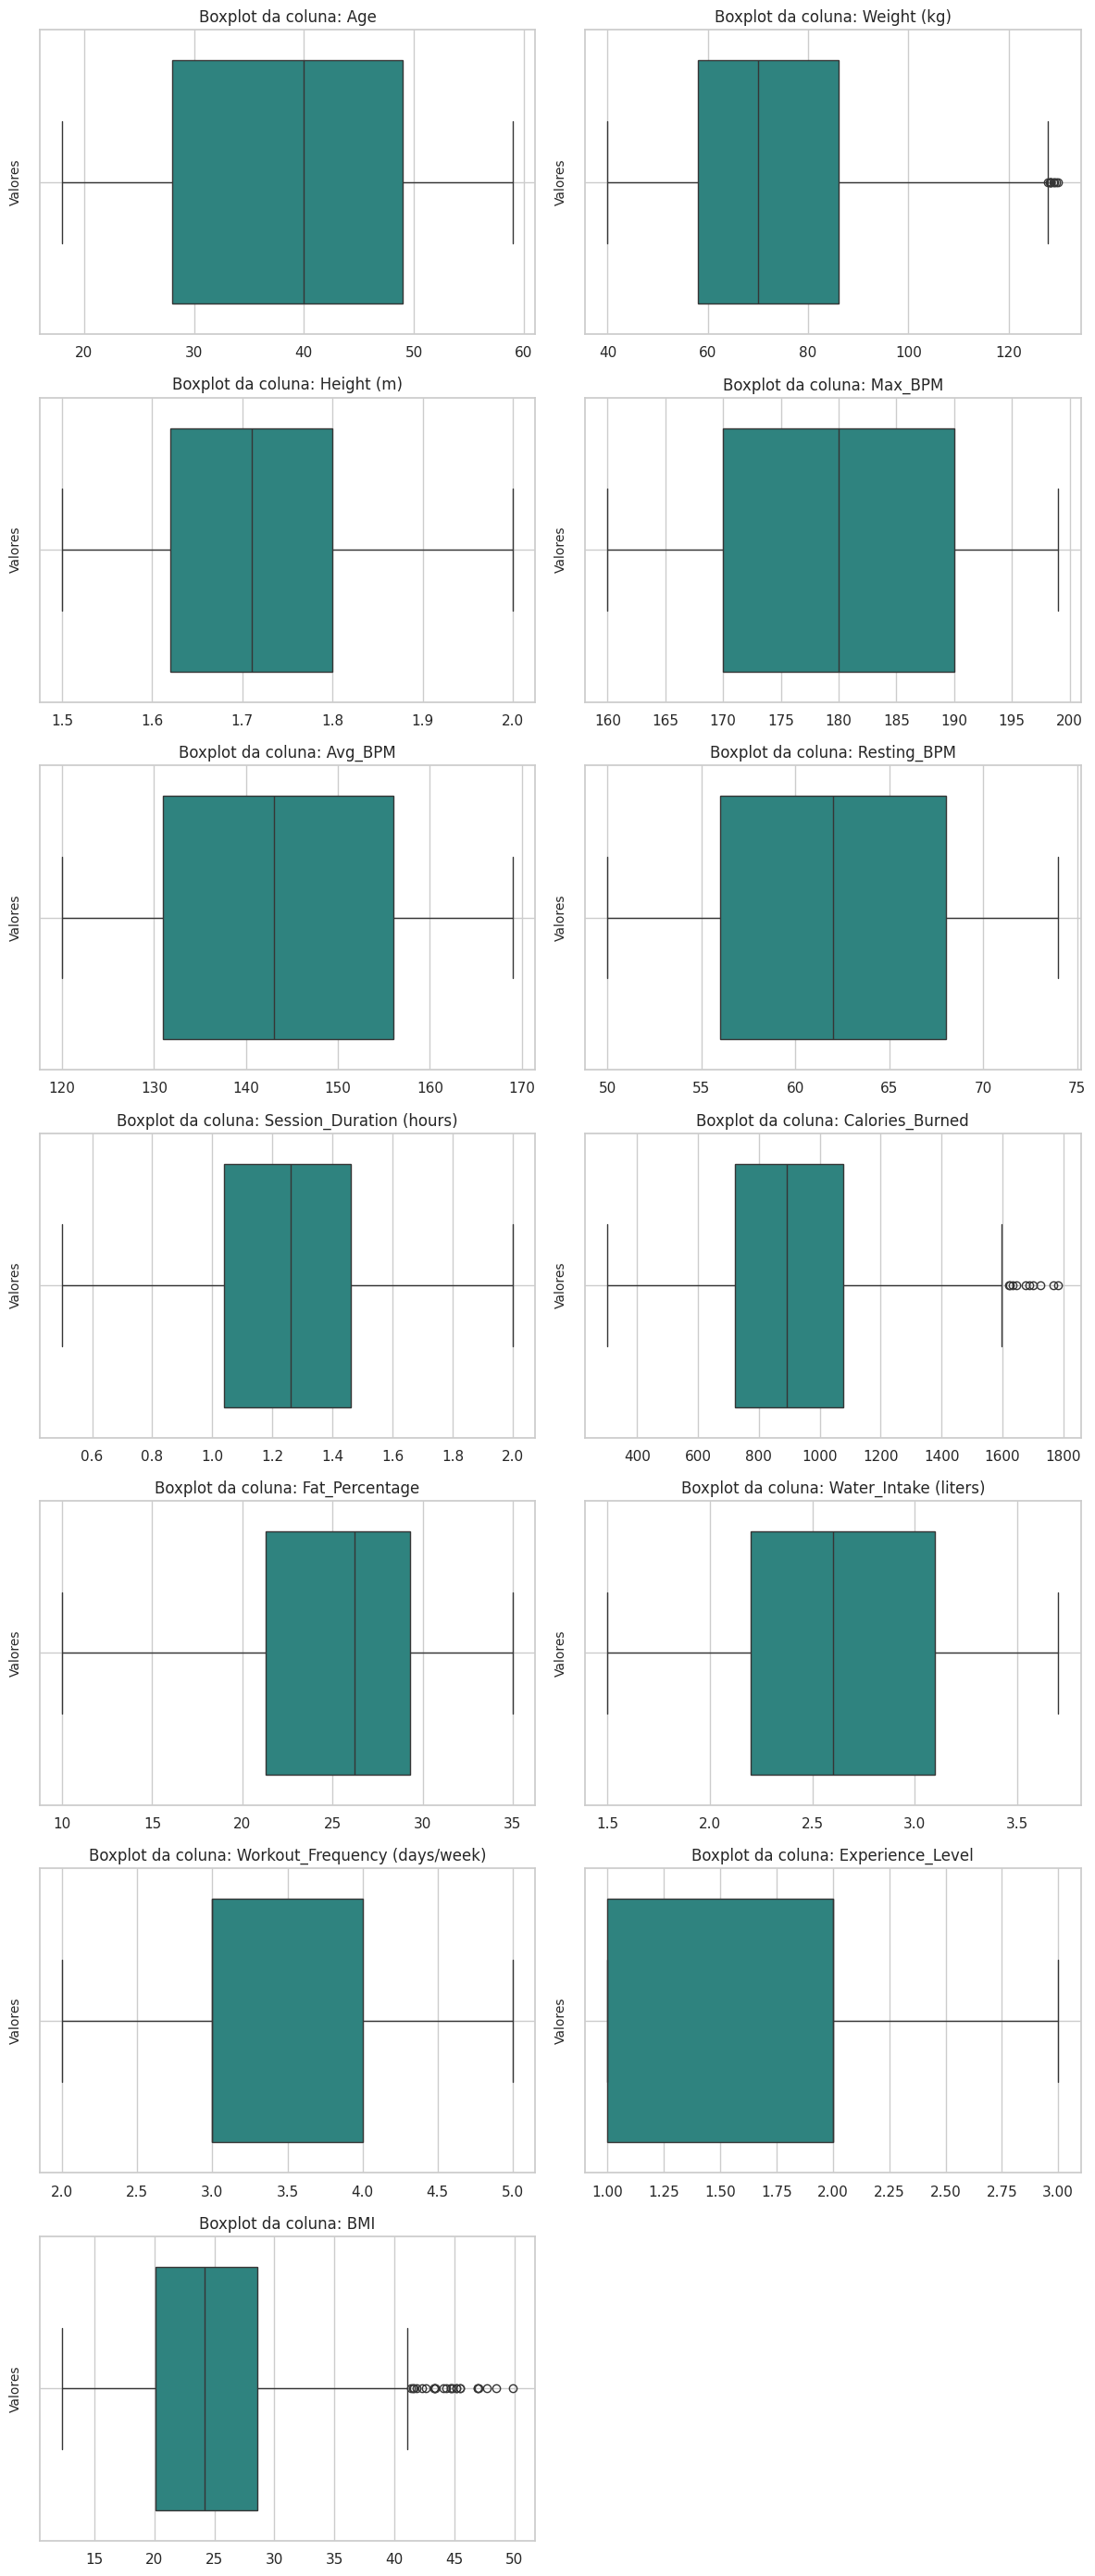

In [32]:
# Chamada da função para plotar os boxplots
boxplots(df_numerico, 2, (12,4))

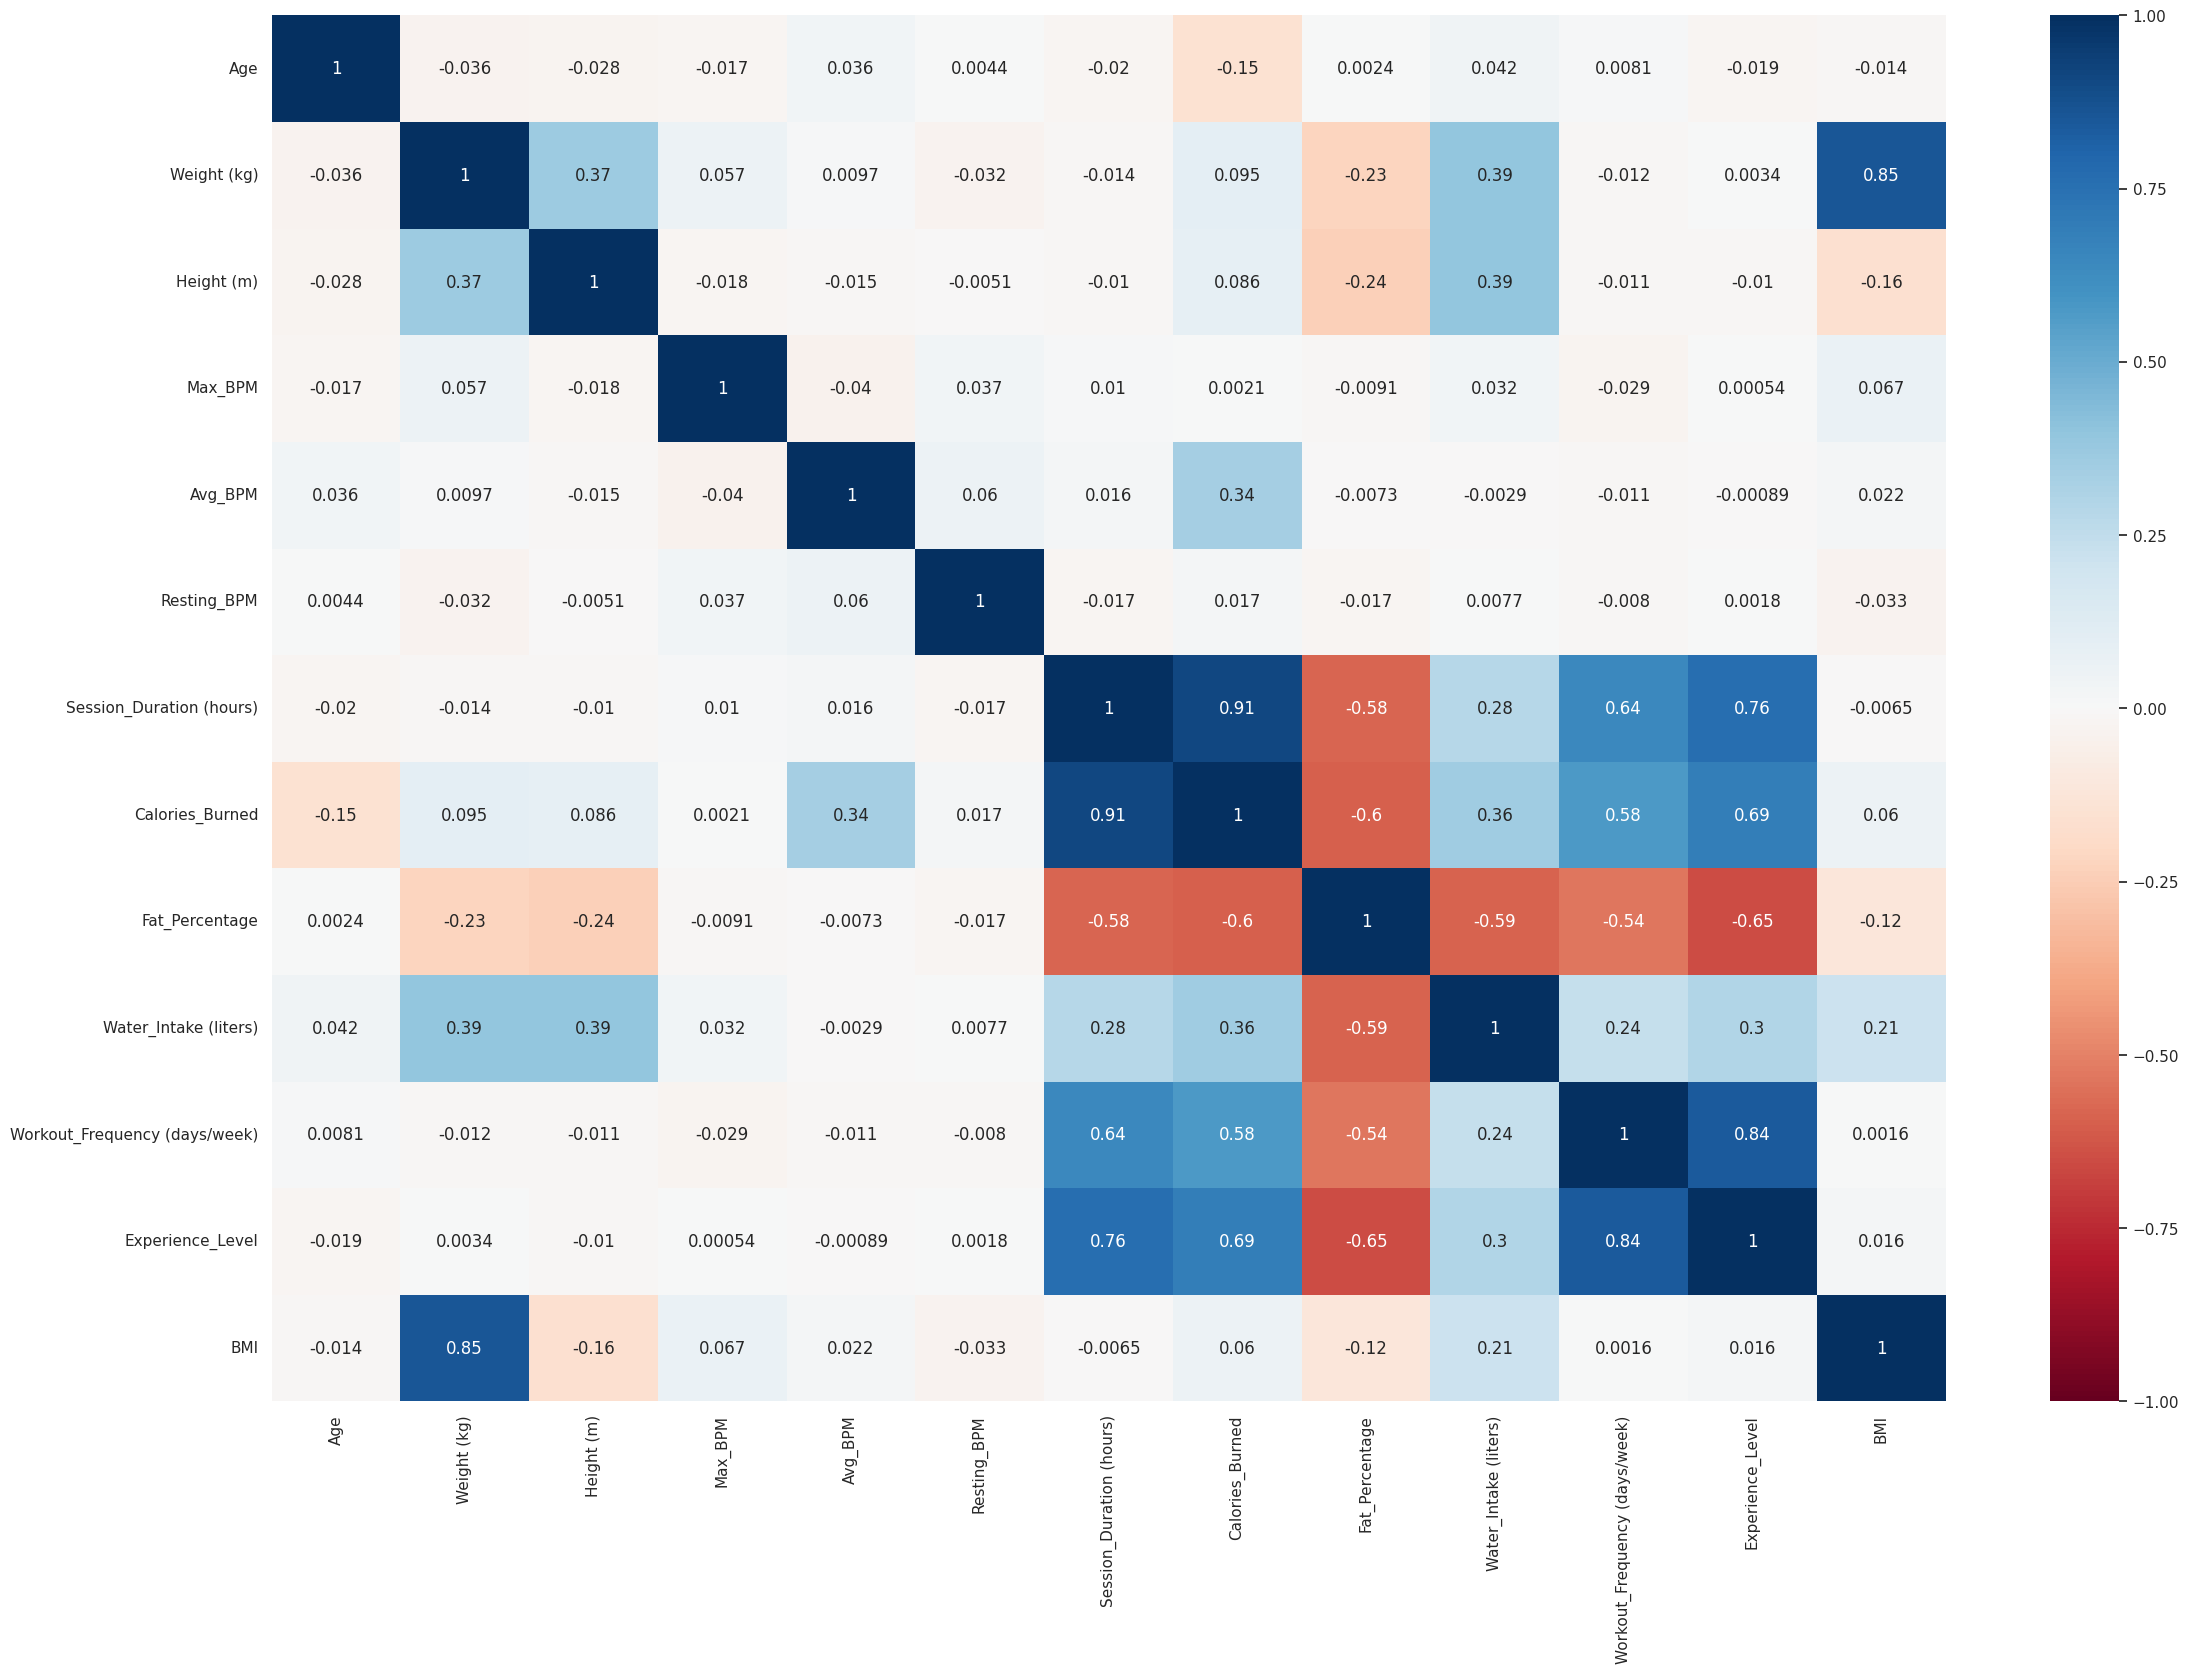

In [33]:
# Gerando a matriz de correlação de Pearson
plt.figure(figsize = (27,18))
sns.heatmap(df_numerico.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Os dados serão divididos em bases de treino e teste.

In [44]:
# Divisão das matrizes
X = dataframe.drop(columns=['Calories_Burned'])  # Atribuir suas features
y = dataframe['Calories_Burned']                 # Atribuir o alvo

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Definir transformações para colunas numéricas e categóricas

numeric_features = ['Age',
                    'Weight (kg)',
                    'Height (m)',
                    'Max_BPM',
                    'Avg_BPM',
                    'Resting_BPM',
                    'Session_Duration (hours)',
                    'Fat_Percentage',
                    'Water_Intake (liters)',
                    'Workout_Frequency (days/week)',
                    'Experience_Level',
                    'BMI'
                    ]  # Substitua pelos nomes das suas colunas numéricas
categorical_features = ['Gender', 'Workout_Type'] # Substitua pelos nomes das suas colunas categóricas

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Combinar transformações com ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Construir o pipeline completo

pipeline = Pipeline(steps=[ ('preprocessor', preprocessor), ('feature_selection', SelectKBest(score_func=f_regression, k=5)), ('classifier', RandomForestRegressor(n_estimators=200, random_state=42)) ])

# Avaliar pipeline
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean cross-validation MSE: {-scores.mean():.2f}')

Mean cross-validation MSE: 5965.26


In [46]:
# Definir parâmetros para grid search
param_grid = {
    'feature_selection__k': [5, 10, 15],                 # Seleção de top-K características
    'classifier': [RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42)], # Changed 'ensemble' to 'classifier'
    'classifier__n_estimators': [100, 200],                # Número de árvores  # Changed 'ensemble__' to 'classifier__'
    'classifier__max_depth': [3, 5, 10]                    # Profundidade da árvore # Changed 'ensemble__' to 'classifier__'
}

In [47]:
# Usar validação cruzada para encontrar o melhor conjunto de hiperparâmetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Weight '
                                                                          '(kg)',
                                                                          'Height '
                                                                          '(m)',
                                                                          'Max_BPM',
                                                                          'Avg_BPM',
                                                                          'Resting_BPM',
                                                                          'Session_Duration '
                                                                          '(hours)',
                                                                          'Fat_Percentage',
                                                                          'Water_Intake '
                                                                          '(liters)',
                                                                          'Workout_Frequency '
                                                                          '(days/week)',
                                                                          'Experience_Level',
                                                                          'BMI']),
                                                                        ('cat...
                                                    score_func=<function f_regression at 0x7f3a554d0f70>)),
                                       ('classifier',
                                        RandomForestRegressor(n_estimators=200,
                                                              random_state=42))]),
             param_grid={'classifier': [RandomForestRegressor(random_state=42),
                                        GradientBoostingRegressor(random_state=42)],
                         'classifier__max_depth': [3, 5, 10],
                         'classifier__n_estimators': [100, 200],
                         'feature_selection__k': [5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [48]:
# Avaliar desempenho no conjunto de teste
y_pred = grid_search.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultados
print("Melhor configuração do modelo:", grid_search.best_params_)
print("MAE no conjunto de teste:", mae)
print("MSE no conjunto de teste:", mse)
print("R² no conjunto de teste:", r2)

Melhor configuração do modelo: {'classifier': GradientBoostingRegressor(random_state=42), 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'feature_selection__k': 10}
MAE no conjunto de teste: 13.24490308217195
MSE no conjunto de teste: 347.64098929306107
R² no conjunto de teste: 0.9958328932281191
